### import des bibliothèques

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### import du dataset

In [165]:
df = pd.read_csv('data\provisoire.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace = True, axis = 1)
df

titre  duree     budget    recette  \
0                      Dumb and Dumber To    110   40000000  169837010   
1     Captain America: The Winter Soldier    136  170000000  714766572   
2                       Тот ещё Карлосон!     80    4000000    9938268   
3                             See No Evil     84    8000000   18707966   
4                            Brother Bear     85  128000000  250397798   
...                                   ...    ...        ...        ...   
3669         Teenage Mutant Ninja Turtles    101  125000000  477200000   
3670                                 Fall    107    3000000   11900000   
3671                            Mat Kilau    118    1814059    5283447   
3672                Ambasamuthiram Ambani    150     400000    2000000   
3673                  Last Minute Marocco     88    2100000     400000   

      casting_score  realisateur_score  compagny_score  suite  Action  \
0              79.0               27.0           135.0      3       0   
1             459.0              128.0            81.0      2       1   
2               0.0                0.0             0.0      1       0   
3               5.0                0.0             0.0      1       0   
4              24.0                0.0             0.0      1       0   
...             ...                ...             ...    ...     ...   
3669           58.0                9.0             4.0      1       1   
3670            1.0                0.0            21.0      1       0   
3671            0.0                0.0             0.0      1       1   
3672            0.0                0.0             1.0      1       0   
3673            0.0                0.0             0.0      1       0   

      Adventure  ...  Music  Romance  Science Fiction  TV Movie  Thriller  \
0             0  ...      0        0                0         0         0   
1             1  ...      0        0                1         0         0   
2             0  ...      0        0                0         0         0   
3             0  ...      0        0                0         0         1   
4             1  ...      0        0                0         0         0   
...         ...  ...    ...      ...              ...       ...       ...   
3669          1  ...      0        0                1         0         0   
3670          0  ...      0        0                0         0         1   
3671          0  ...      0        0                0         0         0   
3672          0  ...      0        1                0         0         0   
3673          0  ...      0        0                0         0         0   

      War  Western  year  month  day  
0       0        0  2014     11   12  
1       0        0  2014      3   20  
2       0        0  2012      3   15  
3       0        0  2006      5   19  
4       0        0  2003     10   23  
...   ...      ...   ...    ...  ...  
3669    0        0  2014      8    7  
3670    0        0  2022      8   11  
3671    1        0  2022      6   23  
3672    0        0  2010      7    2  
3673    0        0  2007      4   13  

[3671 rows x 29 columns]

In [166]:
df['casting_score'] = df['casting_score'].map(int)
df['realisateur_score'] = df['realisateur_score'].map(int)
df['compagny_score'] = df['compagny_score'].map(int)
df.dtypes

titre                object
duree                 int64
budget                int64
recette               int64
casting_score         int64
realisateur_score     int64
compagny_score        int64
suite                 int64
Action                int64
Adventure             int64
Animation             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
History               int64
Horror                int64
Music                 int64
Romance               int64
Science Fiction       int64
TV Movie              int64
Thriller              int64
War                   int64
Western               int64
year                  int64
month                 int64
day                   int64
dtype: object

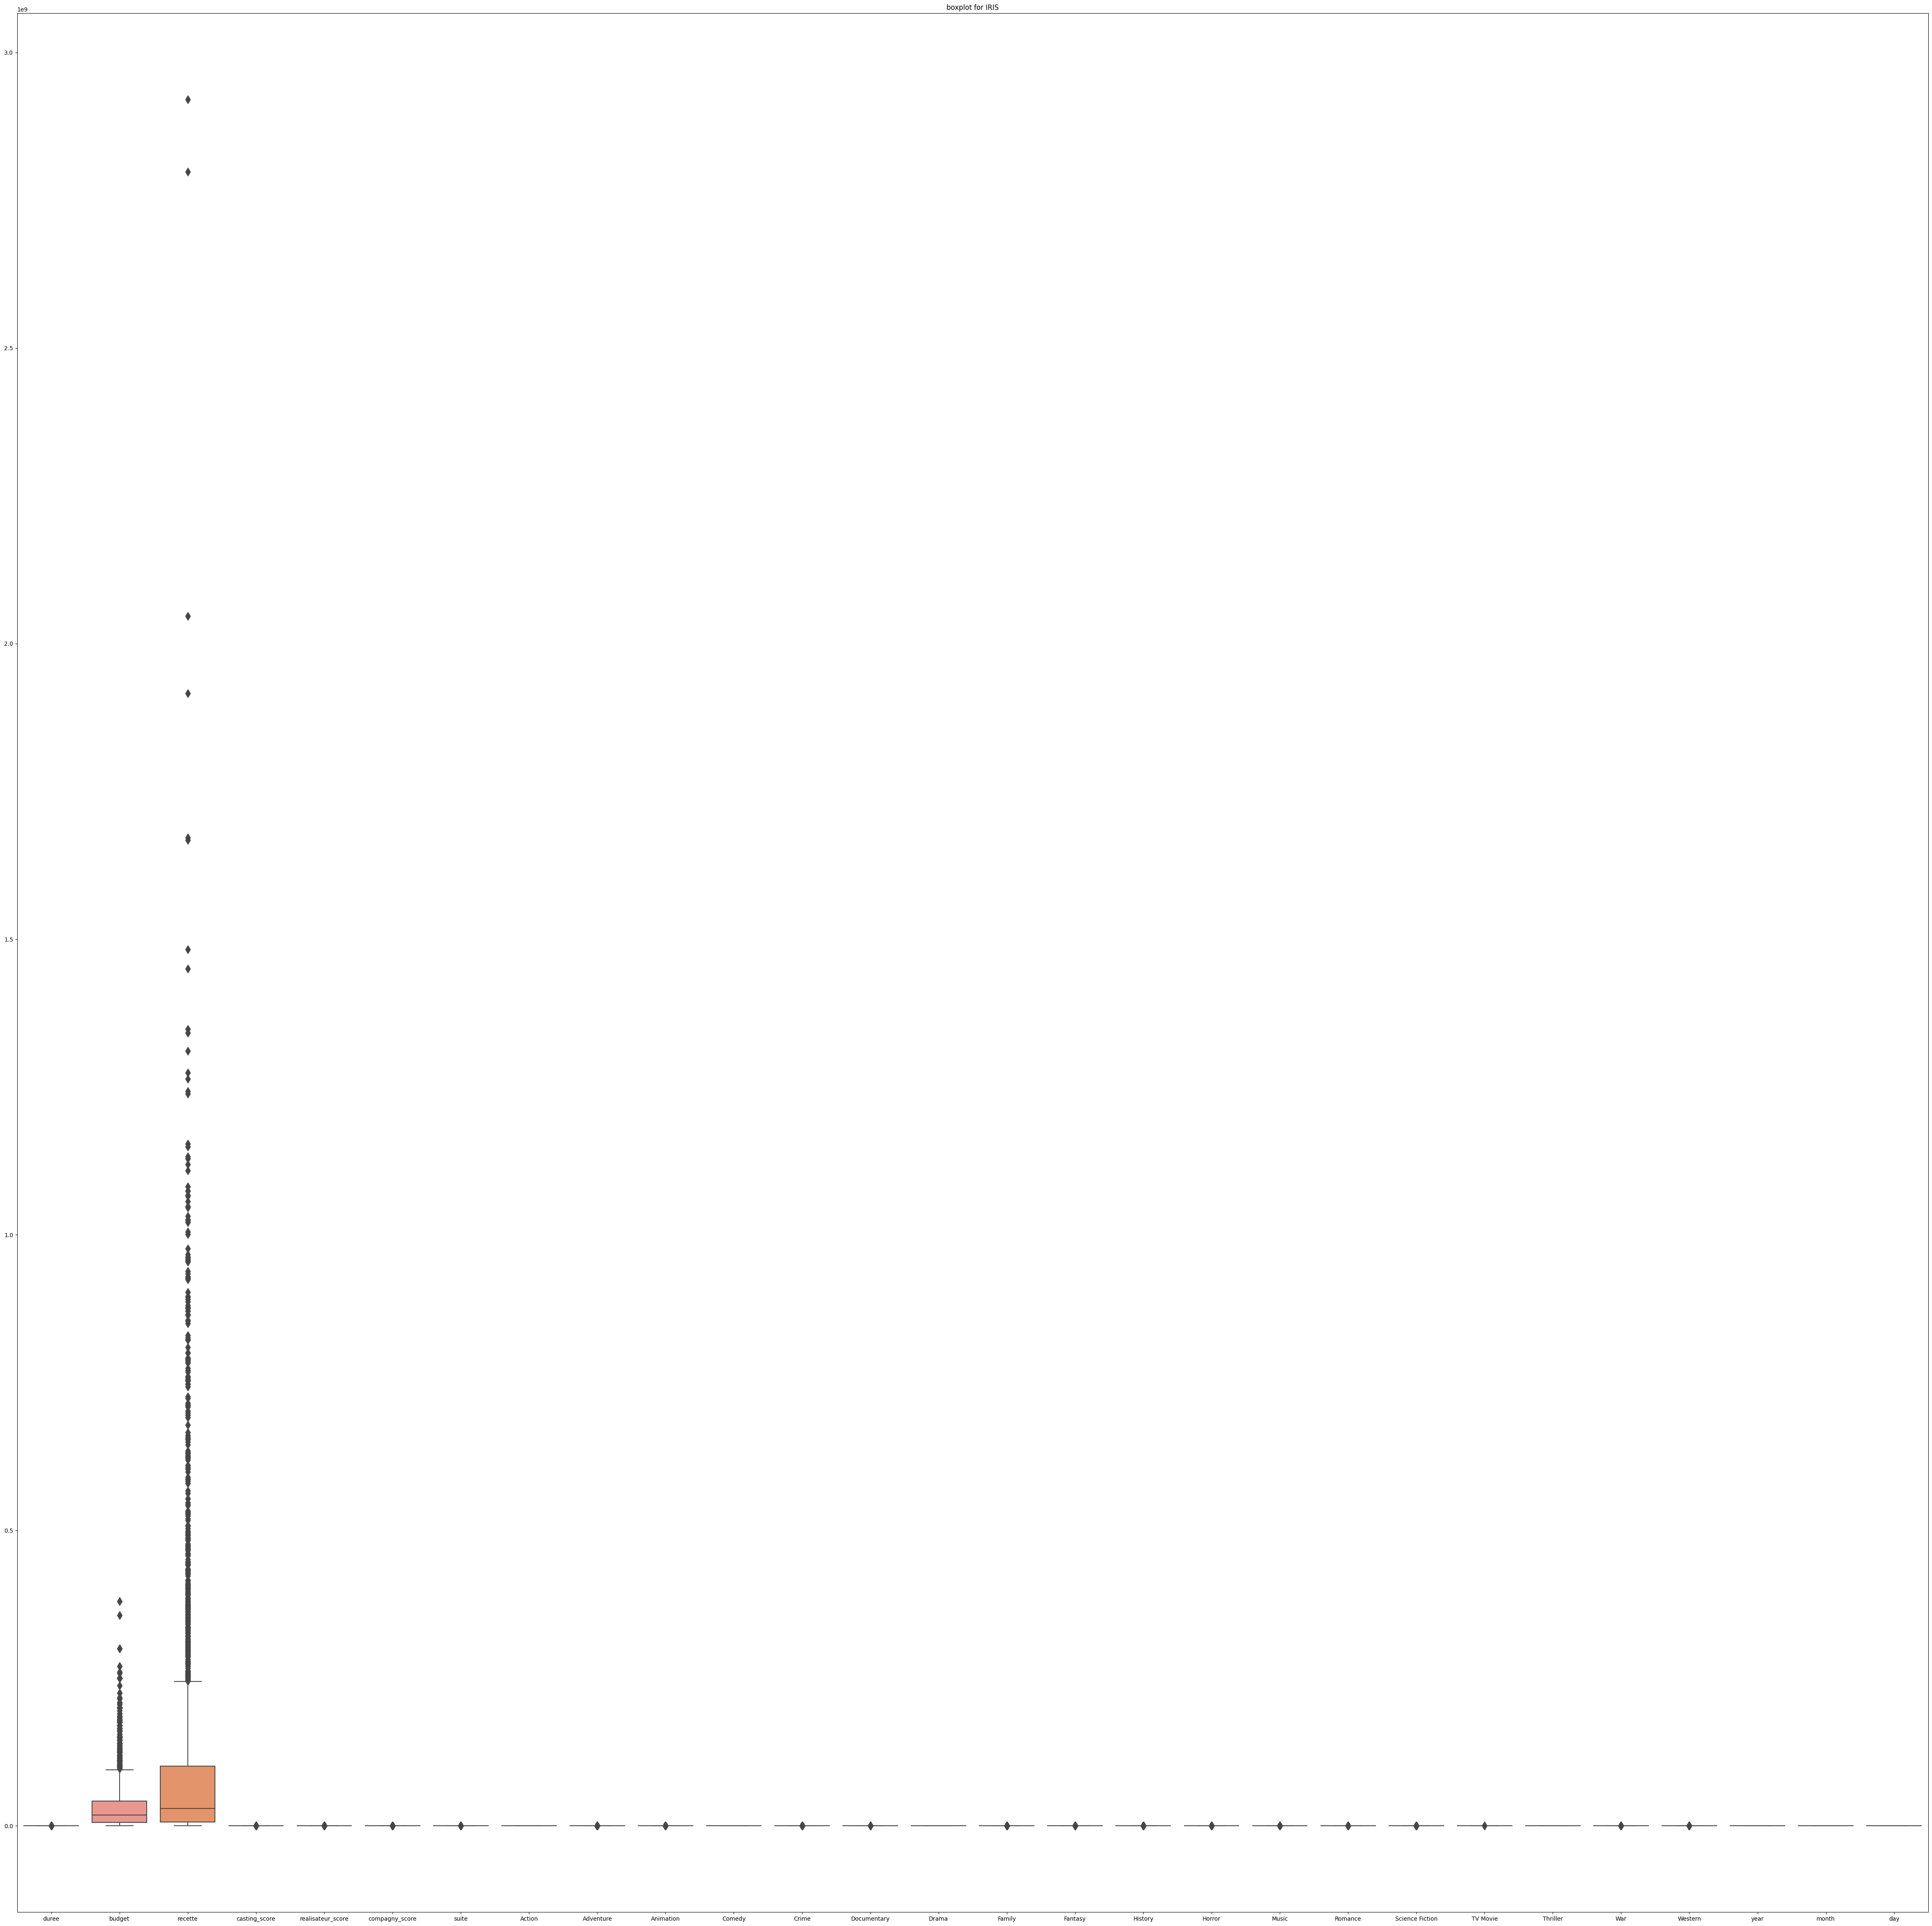

In [167]:
plt.figure(figsize=(60,60))
plt.title('boxplot for IRIS')
iris_box=sns.boxplot(data=df,fliersize=10) 
plt.show()

### librairie pour les arbres 

In [168]:
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

### Création de catégorie de budget

In [169]:
df_sorted = df.sort_values(by = 'recette')

In [170]:
NOMBRE_TRANCHE = 20

In [171]:
data_split = np.array_split(df_sorted, NOMBRE_TRANCHE)

for i in range(NOMBRE_TRANCHE):
    data_split[i]['recette_tranche'] = i + 1

data_sorted = pd.concat(data_split, ignore_index=True)

for i in range(NOMBRE_TRANCHE):
    print(f"la tranche de recette {i + 1} est : [{data_sorted[(data_sorted['recette_tranche'] == i+1) & (data_sorted[data_sorted['recette_tranche'] == i+1]['recette'] == data_sorted[data_sorted['recette_tranche'] == i+1]['recette'].min())].recette.iloc[0]}, {data_sorted[(data_sorted['recette_tranche'] == i+1) & (data_sorted[data_sorted['recette_tranche'] == i+1]['recette'] == data_sorted[data_sorted['recette_tranche'] == i+1]['recette'].max())].recette.iloc[0]}]")

la tranche de recette 1 est : [300000, 850000]
la tranche de recette 2 est : [850419, 1594955]
la tranche de recette 3 est : [1598584, 2540000]
la tranche de recette 4 est : [2556911, 4078741]
la tranche de recette 5 est : [4080000, 6174491]
la tranche de recette 6 est : [6177725, 9074836]
la tranche de recette 7 est : [9077700, 12235843]
la tranche de recette 8 est : [12241855, 16605763]
la tranche de recette 9 est : [16627188, 22108789]
la tranche de recette 10 est : [22159216, 29170410]
la tranche de recette 11 est : [29193330, 37608299]
la tranche de recette 12 est : [37664855, 48854305]
la tranche de recette 13 est : [48902953, 64493915]
la tranche de recette 14 est : [64780213, 80916492]
la tranche de recette 15 est : [81000000, 101624843]
la tranche de recette 16 est : [101758490, 135330182]
la tranche de recette 17 est : [135680000, 179265204]
la tranche de recette 18 est : [179379533, 261989769]
la tranche de recette 19 est : [262500000, 445135288]
la tranche de recette 20 est

In [172]:
data_sorted.drop(['recette'], axis = 1, inplace = True)

In [173]:
data_sorted

titre  duree     budget  casting_score  \
0     ഒരു മുറൈ വന്ത് പാര്‍ത്തായ    151     300000              0   
1                    Ten Canoes     90    2000000              0   
2              My Own Love Song    100    1600000             35   
3                        Орлеан    106    2500000              0   
4                      Carolina     97   15000000             30   
...                         ...    ...        ...            ...   
3666             Jurassic World    124  150000000            137   
3667    Spider-Man: No Way Home    148  200000000            355   
3668     Avengers: Infinity War    149  300000000           1766   
3669          Avengers: Endgame    181  356000000           2002   
3670                     Avatar    162  237000000            144   

      realisateur_score  compagny_score  suite  Action  Adventure  Animation  \
0                     0               0      1       0          0          0   
1                     0               2      1       0          1          0   
2                     0               0      1       0          0          0   
3                     0               0      1       0          0          0   
4                     0               3      1       0          0          0   
...                 ...             ...    ...     ...        ...        ...   
3666                 25             131      4       1          1          0   
3667                 36             184      3       1          1          0   
3668                128              81      3       1          1          0   
3669                128              81      4       1          1          0   
3670                 59             104      4       1          1          0   

      ...  Romance  Science Fiction  TV Movie  Thriller  War  Western  year  \
0     ...        1                0         0         0    0        0  2016   
1     ...        0                0         0         0    0        0  2006   
2     ...        0                0         0         0    0        0  2010   
3     ...        0                0         0         1    0        0  2015   
4     ...        1                0         0         0    0        0  2003   
...   ...      ...              ...       ...       ...  ...      ...   ...   
3666  ...        0                1         0         1    0        0  2015   
3667  ...        0                1         0         0    0        0  2021   
3668  ...        0                1         0         0    0        0  2018   
3669  ...        0                1         0         0    0        0  2019   
3670  ...        0                1         0         0    0        0  2009   

      month  day  recette_tranche  
0         5   27                1  
1         6   29                1  
2         4    7                1  
3         9   17                1  
4         7    4                1  
...     ...  ...              ...  
3666      6    6               20  
3667     12   15               20  
3668      4   25               20  
3669      4   24               20  
3670     12   15               20  

[3671 rows x 29 columns]

### creation d'un train et d'un texte

In [174]:
X = data_sorted.drop(['recette_tranche', 'titre'], axis = 1)
Y = data_sorted['recette_tranche']

division du dataset en un train et un test

In [175]:
"""
    Constant indicating the proportion of the dataset to use as training set.
"""

TRAINING_SET_RATIO = 0.9

In [176]:
ind = [i for i in range(df.shape[0])]
shuffle(ind)
train_X=X.iloc[ind[:int(TRAINING_SET_RATIO*df.shape[0])]]
train_Y=Y.iloc[ind[:int(TRAINING_SET_RATIO*df.shape[0])]]
test_X=X.iloc[ind[int(TRAINING_SET_RATIO*df.shape[0]):]]
test_Y=Y.iloc[ind[int(TRAINING_SET_RATIO*df.shape[0]):]]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(3303, 27)
(3303,)
(368, 27)
(368,)


In [177]:
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_split = 2, min_samples_leaf = 26)
clf = clf.fit(train_X_scaled, train_Y)
clf.score(test_X_scaled,test_Y)

0.07065217391304347

In [178]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_X, train_Y)
neigh.score(test_X, test_Y)

0.12771739130434784

In [179]:
best_score = 0
best_i = 0
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_X, train_Y)
    score = neigh.score(test_X,test_Y)
    print(f'pour {i} le score est {score}')
    if score > best_score:
        best_score = score
        best_i = i
    
print(f'le meilleur score est {best_score} pour i = {best_i}')

pour 1 le score est 0.13043478260869565
pour 2 le score est 0.11684782608695653
pour 3 le score est 0.11413043478260869
pour 4 le score est 0.11956521739130435
pour 5 le score est 0.13043478260869565
pour 6 le score est 0.11684782608695653
pour 7 le score est 0.12771739130434784
pour 8 le score est 0.12771739130434784
pour 9 le score est 0.13043478260869565
pour 10 le score est 0.12771739130434784
pour 11 le score est 0.13858695652173914
pour 12 le score est 0.1331521739130435
pour 13 le score est 0.12771739130434784
pour 14 le score est 0.11956521739130435
pour 15 le score est 0.12771739130434784
pour 16 le score est 0.11413043478260869
pour 17 le score est 0.11141304347826086
pour 18 le score est 0.11956521739130435
pour 19 le score est 0.125
pour 20 le score est 0.13043478260869565
pour 21 le score est 0.13043478260869565
pour 22 le score est 0.12771739130434784
pour 23 le score est 0.13043478260869565
pour 24 le score est 0.1358695652173913
pour 25 le score est 0.13858695652173914


In [180]:
best_score = 0
best_depth = 0
best_split = 0
best_tree = 0
for depth in range(2,15):
    for split in range(2,15):
        for leaf in range(1,15):

            clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = depth, min_samples_split = split, min_samples_leaf = leaf)
            clf = clf.fit(train_X, train_Y)
            score = clf.score(test_X,test_Y)
            print(f'pour max_depth = {depth}, min_samples_split = {split}, min_samples_leaf = {leaf}, le score est {score}')
            if score > best_score :
                best_score = score
                best_depth = depth
                best_split = split
                best_leaf = leaf
                best_tree = clf
(f'pour max_depth = {best_depth}, min_samples_split = {best_split}, min_samples_leaf = {best_leaf}, on a le best_score qui est {best_score}')


pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 1, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 2, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 3, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 4, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 5, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 6, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 7, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 8, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 9, le score est 0.11684782608695653
pour max_depth = 2, min_samples_split = 2, min_samples_leaf = 10, le score est 0.11684782608695653
pour max_depth = 2,

'pour max_depth = 12, min_samples_split = 13, min_samples_leaf = 5, on a le best_score qui est 0.17119565217391305'

In [181]:
## Way 1 : show tree
fn=['duree', 'budget', 'casting_score', 'realisateur_score', 'compagny_score', 'suite', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'year', 'month', 'day']
cn=[f'{i}' for i in range(NOMBRE_TRANCHE)]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)

tree.plot_tree(best_tree,
           feature_names = fn, 
           class_names=cn,
           filled = True)

[Text(0.6337986770393812, 0.9615384615384616, 'budget <= 73500000.0\ngini = 0.95\nsamples = 3303\nvalue = [169, 165, 169, 169, 162, 171, 163, 167, 164, 171\n163, 166, 157, 164, 163, 160, 162, 166, 165, 167]\nclass = 5'),
 Text(0.35097463959212377, 0.8846153846153846, 'budget <= 8510000.0\ngini = 0.946\nsamples = 2824\nvalue = [168, 165, 169, 169, 161, 170, 160, 162, 162, 166\n157, 163, 144, 148, 149, 137, 116, 88, 54, 16]\nclass = 5'),
 Text(0.13350474683544303, 0.8076923076923077, 'budget <= 935000.0\ngini = 0.91\nsamples = 1097\nvalue = [135, 129, 131, 123, 111, 93, 96, 66, 51, 40, 28\n33, 18, 10, 14, 7, 6, 5, 1, 0]\nclass = 0'),
 Text(0.035161744022503515, 0.7307692307692307, 'budget <= 500858.5\ngini = 0.785\nsamples = 143\nvalue = [41, 43, 19, 19, 10, 4, 4, 1, 0, 1, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0]\nclass = 1'),
 Text(0.02109704641350211, 0.6538461538461539, 'budget <= 497671.5\ngini = 0.729\nsamples = 64\nvalue = [28, 13, 8, 9, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0\n0, 0, 0, 0, 0, 0]\nclass 